In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
from sklearn.model_selection import train_test_split


df = pd.read_parquet('data/combined_data.parquet')
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: (6458400, 14)
Memory usage: 689.83 MB


In [41]:
df.info()

display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6458400 entries, 0 to 6458399
Data columns (total 14 columns):
 #   Column       Dtype  
---  ------       -----  
 0   lat          float64
 1   lon          float64
 2   year         int64  
 3   month        int64  
 4   ppt          float64
 5   tdmean       float64
 6   tmax         float64
 7   vpdmax       float64
 8   burned_area  float64
 9   ndvi         float64
 10  landcover    float64
 11  elevation    float64
 12  slope        float64
 13  aspect       float64
dtypes: float64(12), int64(2)
memory usage: 689.8 MB


,lat,lon,year,month,ppt,tdmean,tmax,vpdmax,burned_area,ndvi,landcover,elevation,slope,aspect
0,32.53333,-117.60833,2000,1,NaN,NaN,NaN,NaN,0.0,NaN,52.0,275.700588,0.24857,-0.458612
1,32.53333,-117.60833,2000,2,NaN,NaN,NaN,NaN,0.0,NaN,52.0,275.700588,0.24857,-0.458612
2,32.53333,-117.60833,2000,3,NaN,NaN,NaN,NaN,0.0,NaN,52.0,275.700588,0.24857,-0.458612
3,32.53333,-117.60833,2000,4,NaN,NaN,NaN,NaN,0.0,NaN,52.0,275.700588,0.24857,-0.458612
4,32.53333,-117.60833,2000,5,NaN,NaN,NaN,NaN,0.0,NaN,52.0,275.700588,0.24857,-0.458612


In [42]:
df.dropna(inplace=True)

In [43]:
spatial_nulls = df.groupby(['lat', 'lon']).mean().reset_index()

# cols_to_scale = ['ppt_null', 'tdmean_null', 'tmax_null', 'vpdmax_null', 'ndvi_null', 'landcover_null']
# spatial_nulls[cols_to_scale] = spatial_nulls[cols_to_scale] * 100

def plot_null_map(target_col):
    fig = px.scatter_map(
        spatial_nulls,
        lat="lat",
        lon="lon",
        color=target_col,
        
        color_continuous_scale="RdYlGn_r", 
        
        hover_data={
            "lat": True, 
            "lon": True, 
            # "ndvi_null": ":.1f",
            # "ppt_null": ":.1f",
            # "landcover_null": ":.1f"
        },
        
        zoom=8, 
        center={"lat": 33.0, "lon": -117.0}, 
        height=700,
        title=f"Spatial Distribution of Null Values (%)",
        labels={target_col: f"{target_col} null %"}
    )

    fig.update_traces(marker=dict(size=6, opacity=0.4))
    fig.update_layout(
        mapbox_style="open-street-map",
        margin={"r":0,"t":50,"l":0,"b":0}
    )

    fig.show()

plot_null_map('landcover')

In [44]:
df['ppt_log'] = np.log1p(df['ppt'])

In [45]:
df['vpdmax_log'] = np.log1p(df['vpdmax'])

In [46]:
df.drop(columns = ['ppt'], inplace = True)

In [47]:
df

,lat,lon,year,month,tdmean,tmax,vpdmax,burned_area,ndvi,landcover,elevation,slope,aspect,ppt_log,vpdmax_log
72016,32.54167,-117.14167,2001,5,14.209,20.260000,7.263000,0.0,0.2401,22.0,323.777086,0.058712,-0.948823,0.000000,2.111788
72017,32.54167,-117.14167,2001,6,15.463,20.700001,6.338000,0.0,0.2401,22.0,323.777086,0.058712,-0.948823,0.000000,1.993066
72022,32.54167,-117.14167,2001,11,12.532,19.480001,7.994000,0.0,0.2333,22.0,323.777086,0.058712,-0.948823,3.062316,2.196558
72023,32.54167,-117.14167,2001,12,7.169,16.950001,9.871000,0.0,0.1659,22.0,323.777086,0.058712,-0.948823,2.603800,2.386099
72037,32.54167,-117.14167,2003,2,9.359,18.510000,10.383000,0.0,0.1728,22.0,323.777086,0.058712,-0.948823,4.577706,2.432121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5959795,33.42500,-116.13333,2024,8,15.302,41.298000,62.974998,0.0,0.1254,52.0,945.556857,0.048987,-0.912212,0.000000,4.158492
5959796,33.42500,-116.13333,2024,9,11.816,39.345001,60.382000,0.0,0.1291,52.0,945.556857,0.048987,-0.912212,0.000000,4.117117
5959797,33.42500,-116.13333,2024,10,6.739,34.979000,48.771000,0.0,0.1153,52.0,945.556857,0.048987,-0.912212,0.000000,3.907432
5959798,33.42500,-116.13333,2024,11,0.378,23.204000,22.214001,0.0,0.1224,52.0,945.556857,0.048987,-0.912212,0.000000,3.144756


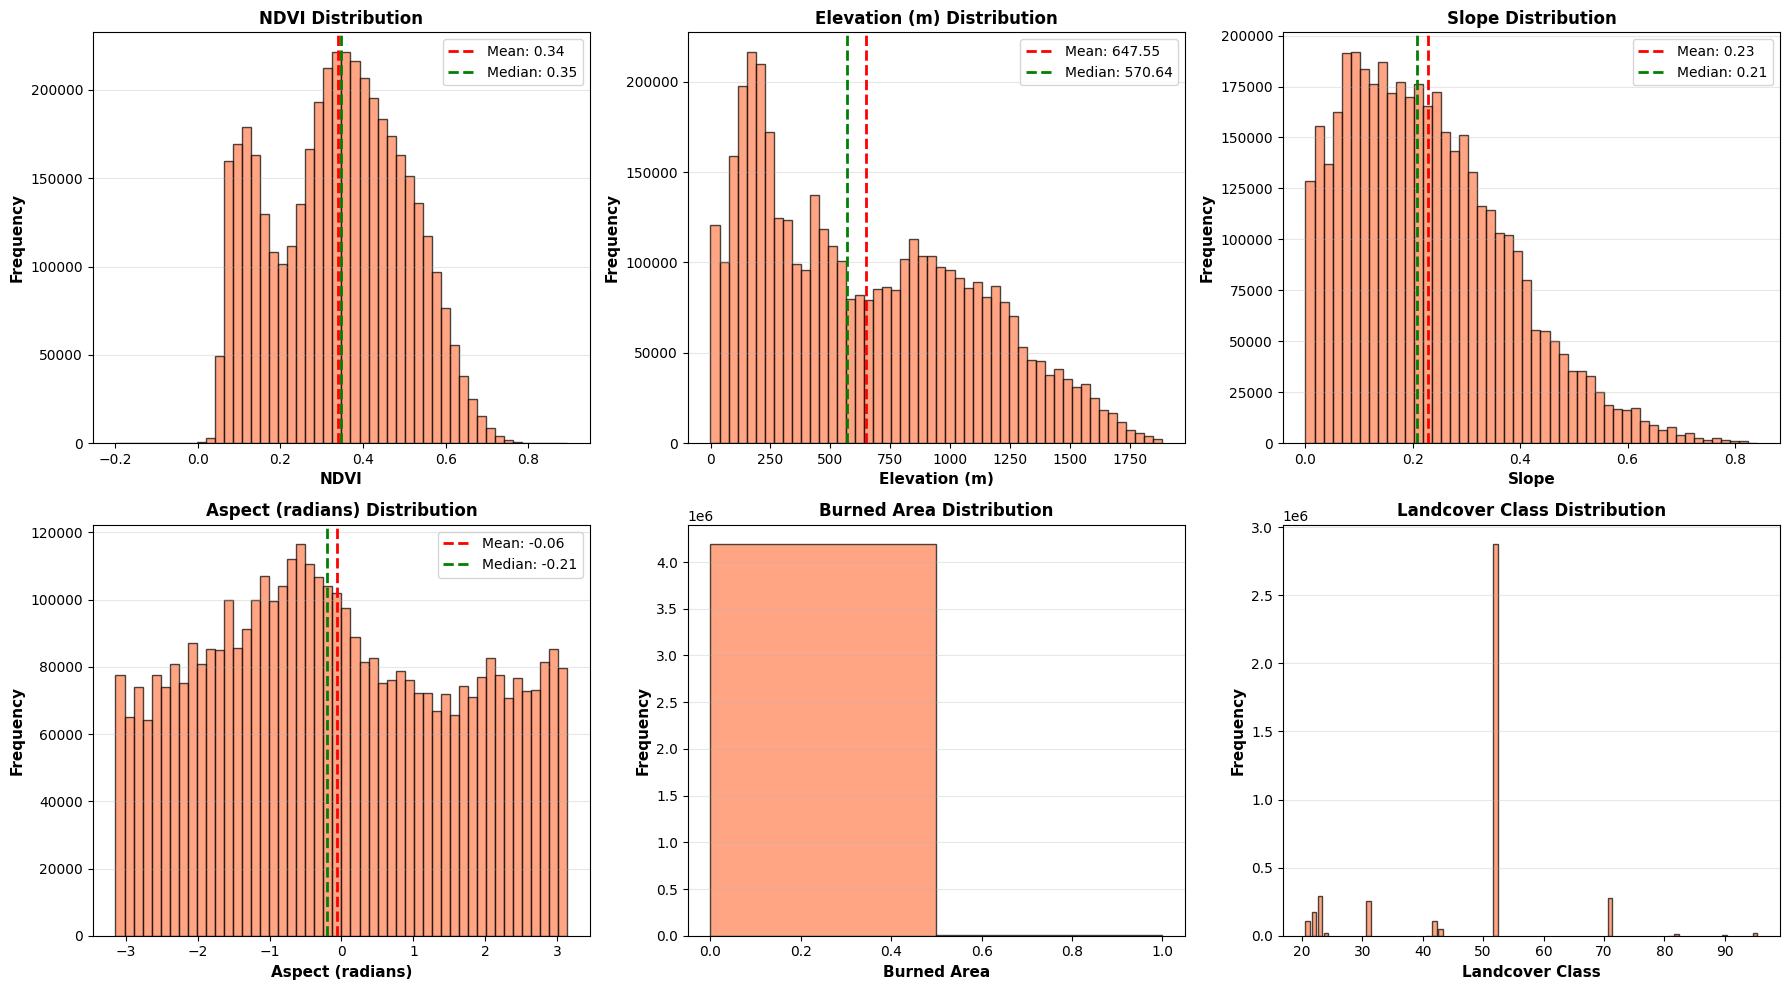

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

vars_to_plot = [
    ('ndvi', 'NDVI', 50),
    ('elevation', 'Elevation (m)', 50),
    ('slope', 'Slope', 50),
    ('aspect', 'Aspect (radians)', 50),
    ('burned_area', 'Burned Area', 2),
    ('landcover', 'Landcover Class', 20)
]

for idx, (var, label, bins) in enumerate(vars_to_plot):
    data = df[var].dropna()
    
    if var == 'landcover':
        # Bar plot for categorical
        value_counts = data.value_counts().sort_index()
        axes[idx].bar(value_counts.index, value_counts.values, alpha=0.7, color='coral', edgecolor='black')
    else:
        axes[idx].hist(data, bins=bins, alpha=0.7, color='coral', edgecolor='black')
        if var != 'burned_area':  # Skip mean/median for binary
            axes[idx].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
            axes[idx].axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data.median():.2f}')
    
    axes[idx].set_xlabel(label, fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontweight='bold', fontsize=11)
    axes[idx].set_title(f'{label} Distribution', fontweight='bold', fontsize=12)
    if var != 'landcover' and var != 'burned_area':
        axes[idx].legend()
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

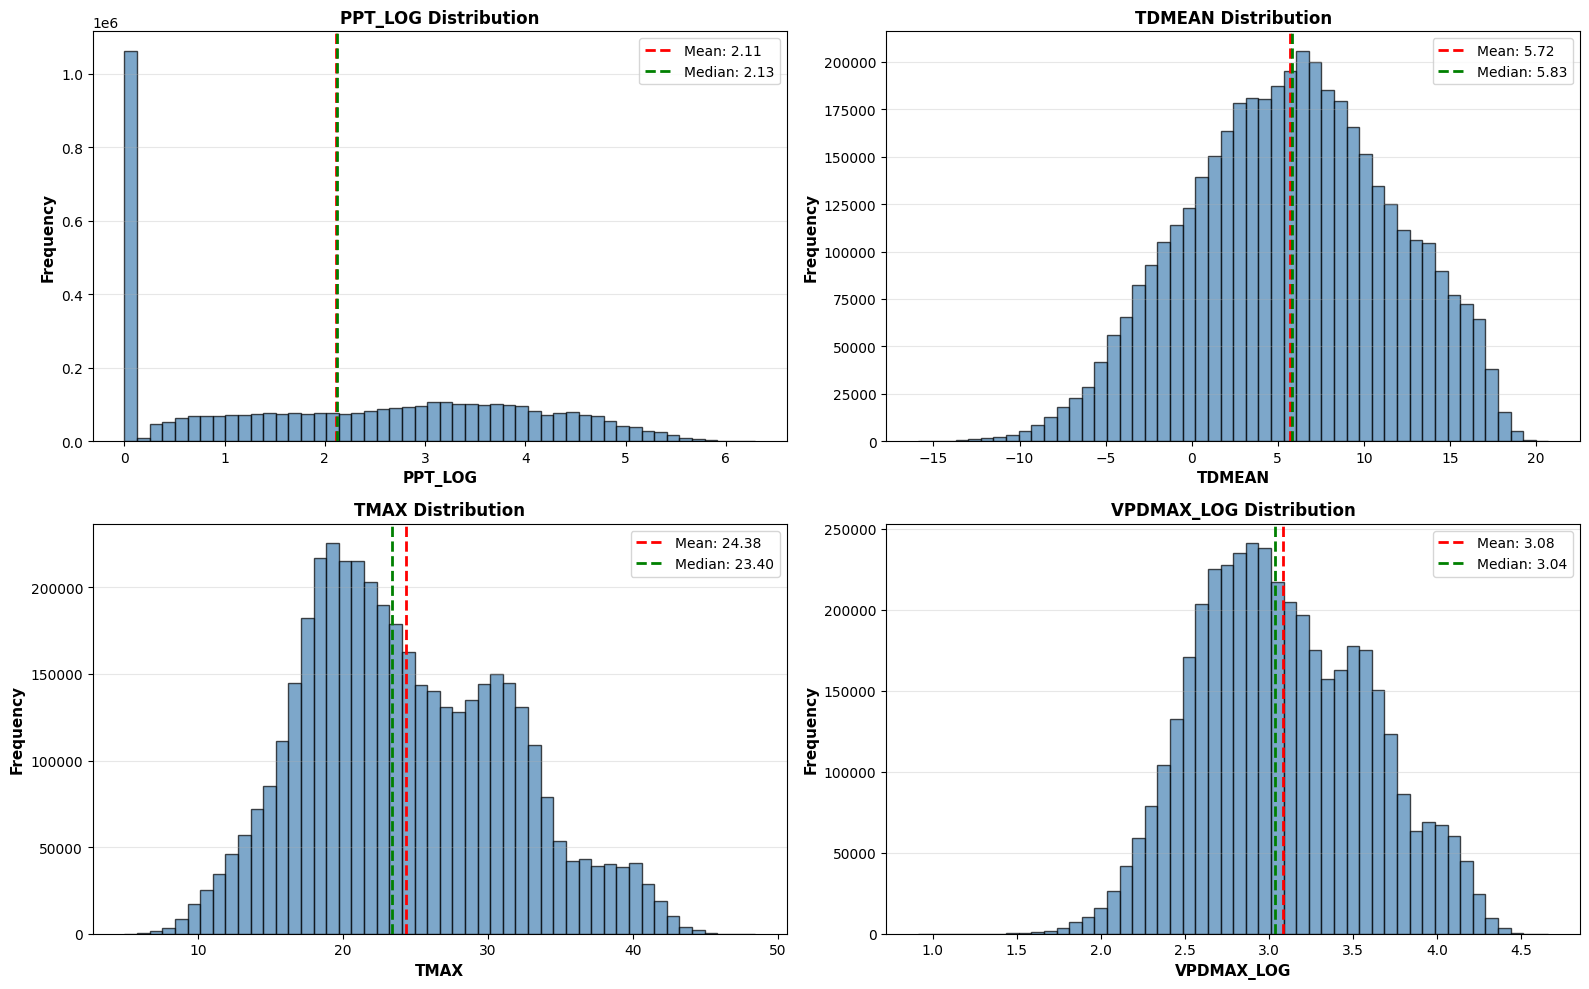

In [49]:
climate_vars = ['ppt_log', 'tdmean', 'tmax', 'vpdmax_log']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, var in enumerate(climate_vars):
    data = df[var].dropna()
    
    axes[idx].hist(data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
    axes[idx].axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data.median():.2f}')
    
    axes[idx].set_xlabel(var.upper(), fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontweight='bold', fontsize=11)
    axes[idx].set_title(f'{var.upper()} Distribution', fontweight='bold', fontsize=12)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [51]:

# Separate validation set (2005-2009)
validation_set = df[(df['year'] >= 2005) & (df['year'] <= 2009)]

# Remaining data (everything except 2005-2009)
remaining_data = df[(df['year'] < 2005) | (df['year'] > 2009)]

# Split remaining data into train (70%) and test (30%)
train_set, test_set = train_test_split(remaining_data, test_size=0.3, random_state=42)

# Print shapes to verify
print(f"Validation set shape: {validation_set.shape}")
print(f"Train set shape: {train_set.shape}")
print(f"Test set shape: {test_set.shape}")
print(f"\nValidation years: {sorted(validation_set['year'].unique())}")
print(f"Train years: {sorted(train_set['year'].unique())}")
print(f"Test years: {sorted(test_set['year'].unique())}")

Validation set shape: (841629, 15)
Train set shape: (2346741, 15)
Test set shape: (1005747, 15)

Validation years: [np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009)]
Train years: [np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
Test years: [np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
